In [1]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

In [9]:
#Load the image

original_image = imread(r"C:\Users\Adhi Ganapathy\Documents\Python_ws\PCA_04092025\Image Compression\lokesh-kanakaraj.webp")
print("Actual image size :",original_image.shape)

Actual image size : (720, 1080, 3)


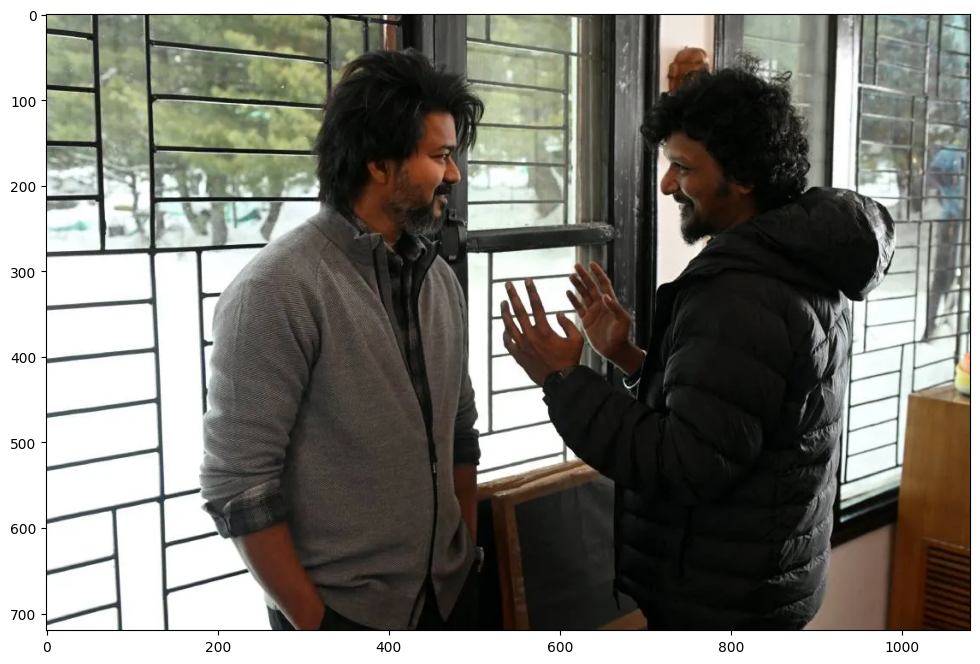

In [18]:
# Display image
plt.figure(figsize=[12,8])
plt.imshow(original_image)


### Transforming color image into Black and White

In [11]:
img_sum = original_image.sum(axis=2)
print("Transformed Image Shape" ,img_sum.shape)

Transformed Image Shape (720, 1080)


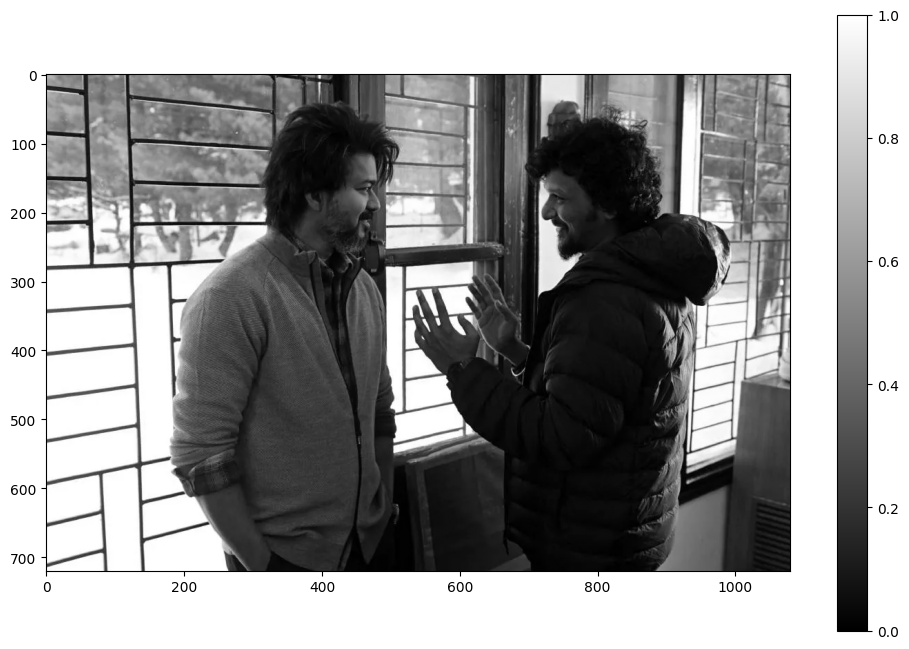

In [16]:
BW_img = img_sum/img_sum.max()
plt.figure(figsize=[12,8])
plt.imshow(BW_img,cmap="gray")
plt.colorbar()

In [19]:
from sklearn.decomposition import PCA, IncrementalPCA
pca=PCA()
pca.fit(BW_img)

PCA()

In [22]:
#An array showing how much variance each principal component explains.
print(pca.explained_variance_ratio_)


[2.88168695e-01 1.82712511e-01 1.11740382e-01 6.86406983e-02
 5.06991305e-02 3.46252108e-02 3.11640824e-02 1.99658956e-02
 1.68019753e-02 1.54809933e-02 1.26557494e-02 1.12315903e-02
 9.47764287e-03 8.26813835e-03 7.51633262e-03 6.75112875e-03
 6.53045983e-03 6.17742394e-03 5.55390126e-03 5.28177235e-03
 4.90031069e-03 4.63895865e-03 3.96911168e-03 3.72009657e-03
 3.41152312e-03 3.29608843e-03 3.11851853e-03 3.03350399e-03
 2.92123032e-03 2.75764582e-03 2.56780685e-03 2.29047370e-03
 2.23230980e-03 2.14321775e-03 2.01681519e-03 1.90903156e-03
 1.66458595e-03 1.59846565e-03 1.50065377e-03 1.46222218e-03
 1.40998451e-03 1.34646613e-03 1.27237635e-03 1.23132968e-03
 1.15693123e-03 1.10333186e-03 1.04682164e-03 1.03316415e-03
 1.01383372e-03 9.81199193e-04 8.79776878e-04 8.68337066e-04
 8.42845378e-04 8.10922298e-04 7.67975639e-04 7.42120468e-04
 7.30457128e-04 7.11900118e-04 6.96661903e-04 6.78337501e-04
 6.19678035e-04 6.17009380e-04 5.85068849e-04 5.55097308e-04
 5.44658201e-04 5.337649

In [23]:
# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")


Number of components explaining 95% variance: 36


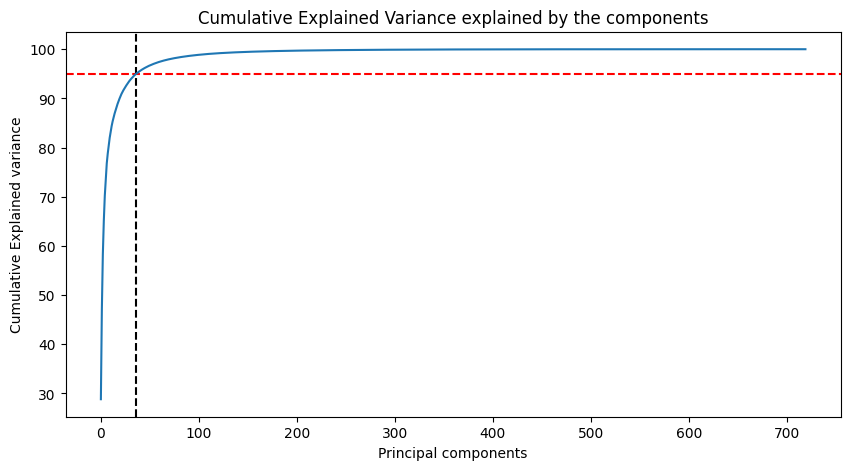

In [24]:
plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

IncrementalPCA works like PCA, but processes data in mini-batches (useful for large datasets like images).

n_components=k → you’re saying “keep only the first k principal components” (the ones that explain 95% variance, from earlier).

In [29]:
Inc_pca= IncrementalPCA(n_components=k)

### Dimensionality reduction

In [31]:
low_dim_img=Inc_pca.fit_transform(BW_img)
low_dim_img

array([[ 5.12442674, -4.53431547,  0.11606257, ..., -0.30765504,
         0.19149347, -0.10102746],
       [ 5.22036486, -4.56483806,  0.1350052 , ..., -0.36398735,
         0.0599953 , -0.03811099],
       [ 5.27349164, -4.63345371,  0.14312403, ..., -0.29403305,
        -0.11515643, -0.06324084],
       ...,
       [-7.36992448, -3.31706171, -0.95081084, ..., -0.4796429 ,
         0.02526319,  0.19617628],
       [-7.34047953, -3.33174099, -0.94782237, ..., -0.47518473,
         0.06879952,  0.21542296],
       [-7.3125459 , -3.35038062, -0.93890755, ..., -0.46323976,
         0.11344097,  0.22346747]], shape=(720, 36))

### Reconstruct Image

In [57]:
Re_cons_img = Inc_pca.inverse_transform(low_dim_img)
Re_cons_img

array([[0.67989978, 0.67277897, 0.66594029, ..., 0.48168494, 0.47731801,
        0.48222443],
       [0.6950232 , 0.68825822, 0.6811922 , ..., 0.47092392, 0.48936067,
        0.51357739],
       [0.70514011, 0.69867362, 0.69193435, ..., 0.46732726, 0.49636038,
        0.52917707],
       ...,
       [0.97162888, 0.97341273, 0.97340204, ..., 0.10941279, 0.12765697,
        0.13417799],
       [0.97368252, 0.97557518, 0.9756495 , ..., 0.11245978, 0.13005889,
        0.13540657],
       [0.97637685, 0.97853424, 0.97886442, ..., 0.11628584, 0.13383018,
        0.1380235 ]], shape=(720, 1080))

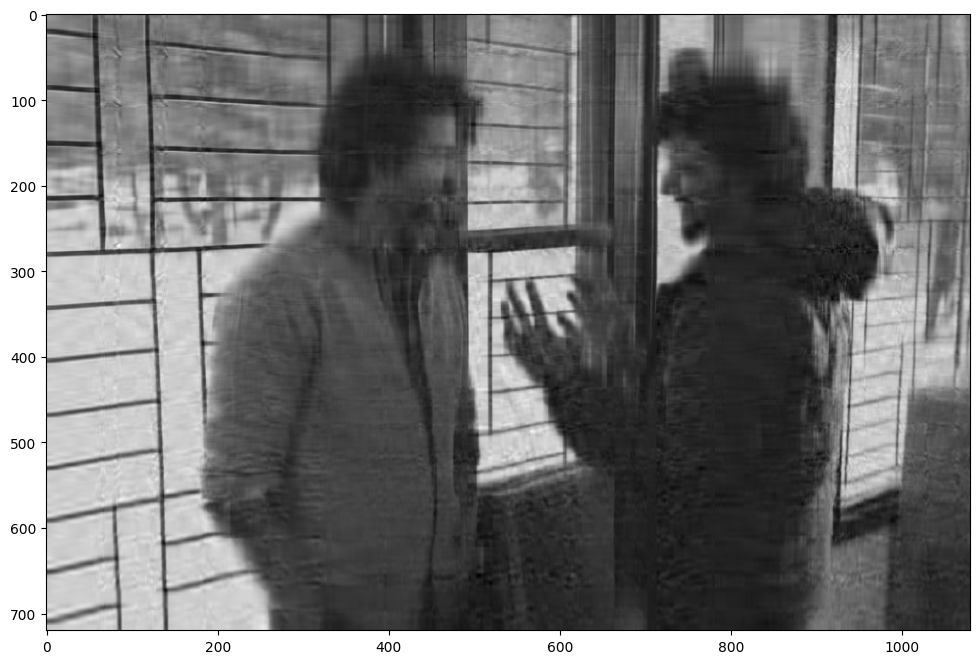

In [34]:
plt.figure(figsize=[12,8])
plt.imshow(Re_cons_img,cmap="gray")

### Let's try out for a series of different value of k components

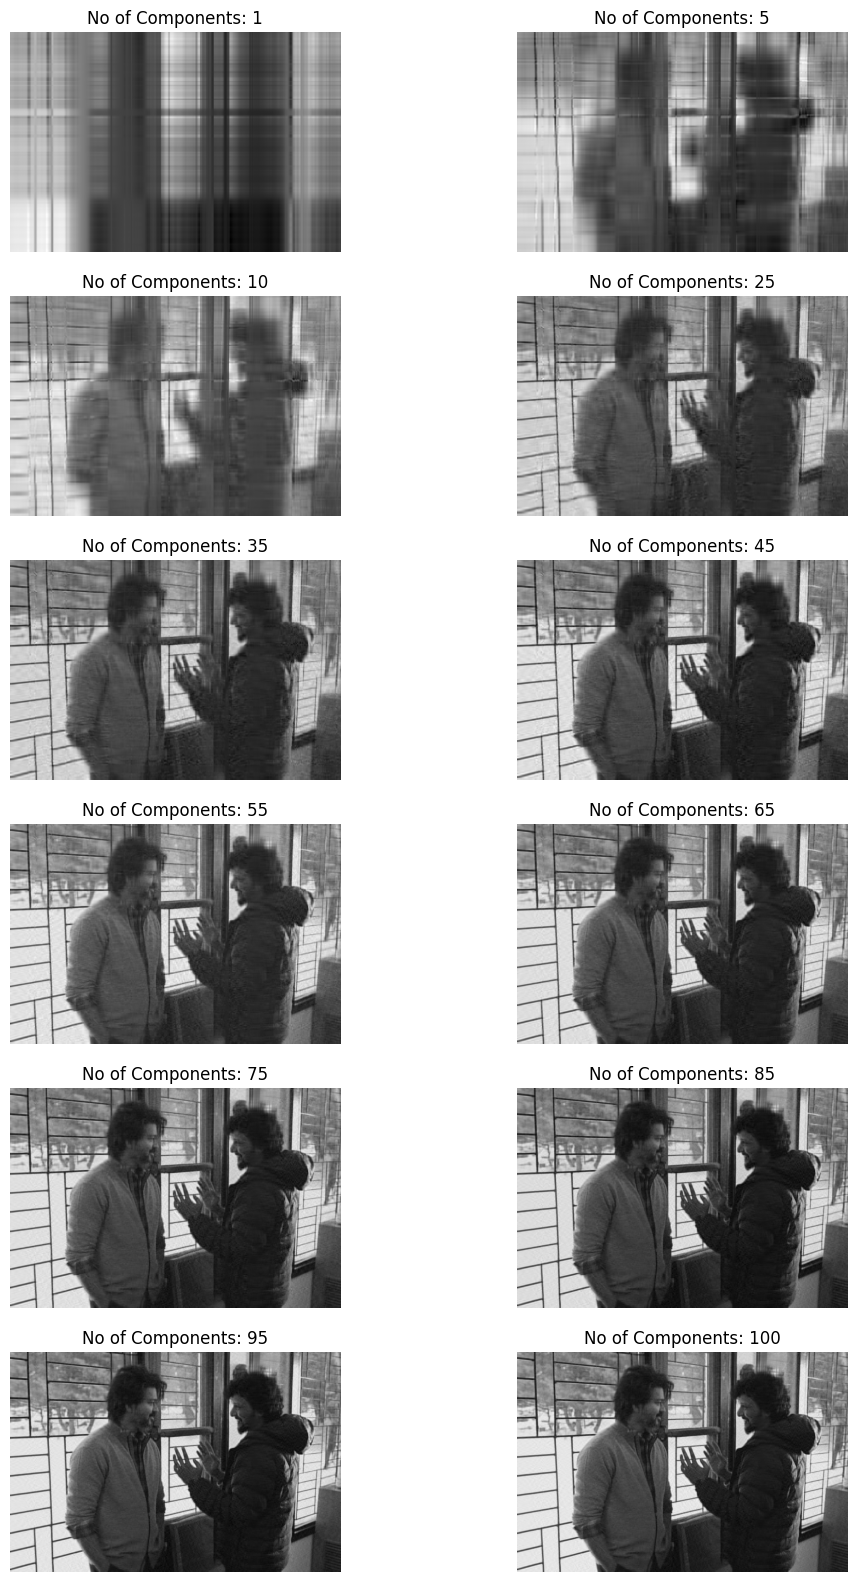

In [56]:
def img_gen(k):
    Inc_pca= IncrementalPCA(n_components=k)
    low_dim_img=Inc_pca.fit_transform(BW_img)
    Re_cons_img = Inc_pca.inverse_transform(low_dim_img)
    return Re_cons_img 
    



components_value = [1, 5, 10, 25, 35,45,55,65, 75,85,95, 100]

n = len(components_value)
plt.figure(figsize=(12,20)) 

for i in range(len(components_value)):
    plt.subplot(6,2,i+1)
    
    plt.title("No of Components: "+str(components_value[i]))
  
    plt.imshow(img_gen(components_value[i]), cmap="gray")
    plt.axis("off")




    